<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#modeling" data-toc-modified-id="modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>modeling</a></span></li></ul></div>

In [2]:
import sys
import os
sys.path.append(os.path.abspath("../src/"))

In [3]:
from load_data import LoadData
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import uuid

In [4]:
uid = uuid.uuid1()

In [5]:
alg = "rf"

In [6]:
docs = "../docs/"
finfo = docs + "info/" + "ddl.csv"

data = "../data/"
data_in, data_mid, data_out = [data + fld for fld in ["in/", "mid/", "out/"]]

fin, ftest = data_in + "train_data.csv", data_in + "test_data.csv"
fmid = data_mid + "%s_%s.csv"%(alg, uid)
fout = data_out + "%s_%s.csv"%(alg, uid)

models = "../models/"
mout = models + "%s_%s.pkl"%(alg, uid)

loader = LoadData(fin, ftest, finfo)

In [30]:
X, y, test_X = loader.get_features_v1()

In [9]:
y = y.astype(float)

# modeling

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [11]:
def objective(trial):
    params = {
        'n_estimators': int(trial.suggest_loguniform('n_estimators', 1e+2, 1e+3)),
        'max_depth': int(trial.suggest_loguniform('max_depth', 2, 32)),
        'min_samples_split': trial.suggest_int("min_samples_split", 8, 16)
    }
    clf = RandomForestClassifier(**params)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(clf, scoring="roc_auc", X=X, y=y, cv=kf)
    return 1.0 - scores['test_score'].mean()


In [12]:
%%time
# optuna
study = optuna.create_study()
study.optimize(objective, n_trials=10)

# 最適解
print(study.best_params)
print(study.best_value)
print(study.best_trial)

[I 2019-04-14 03:04:36,909] Finished trial#0 resulted in value: 0.22353235376149894. Current best value is 0.22353235376149894 with parameters: {'n_estimators': 983.3008427958581, 'max_depth': 21.980508394305108, 'min_samples_split': 9}.
[I 2019-04-14 03:06:02,267] Finished trial#1 resulted in value: 0.2234198405145007. Current best value is 0.2234198405145007 with parameters: {'n_estimators': 339.75737148535154, 'max_depth': 20.4828497409631, 'min_samples_split': 9}.
[I 2019-04-14 03:06:14,791] Finished trial#2 resulted in value: 0.23735127270579126. Current best value is 0.2234198405145007 with parameters: {'n_estimators': 339.75737148535154, 'max_depth': 20.4828497409631, 'min_samples_split': 9}.
[I 2019-04-14 03:06:55,756] Finished trial#3 resulted in value: 0.22686679893616102. Current best value is 0.2234198405145007 with parameters: {'n_estimators': 339.75737148535154, 'max_depth': 20.4828497409631, 'min_samples_split': 9}.
[I 2019-04-14 03:07:41,946] Finished trial#4 resulted i

{'n_estimators': 227.41280580531233, 'max_depth': 16.218441243356413, 'min_samples_split': 8}
0.22162881169178228
FrozenTrial(number=6, state=<TrialState.COMPLETE: 1>, value=0.22162881169178228, datetime_start=datetime.datetime(2019, 4, 14, 3, 8, 10, 150199), datetime_complete=datetime.datetime(2019, 4, 14, 3, 9, 1, 151820), params={'n_estimators': 227.41280580531233, 'max_depth': 16.218441243356413, 'min_samples_split': 8}, user_attrs={}, system_attrs={'_number': 6}, intermediate_values={}, params_in_internal_repr={'n_estimators': 227.41280580531233, 'max_depth': 16.218441243356413, 'min_samples_split': 8}, trial_id=6)
Wall time: 10min 3s


In [13]:
study.optimize(objective, n_trials=10)

# 最適解
print(study.best_params)
print(study.best_value)
print(study.best_trial)

[I 2019-04-14 03:13:41,737] Finished trial#10 resulted in value: 0.22316437282907997. Current best value is 0.22162881169178228 with parameters: {'n_estimators': 227.41280580531233, 'max_depth': 16.218441243356413, 'min_samples_split': 8}.
[I 2019-04-14 03:14:30,111] Finished trial#11 resulted in value: 0.2213089580895531. Current best value is 0.2213089580895531 with parameters: {'n_estimators': 300.9048421486603, 'max_depth': 10.270117474733778, 'min_samples_split': 12}.
[I 2019-04-14 03:15:32,456] Finished trial#12 resulted in value: 0.22326422810828395. Current best value is 0.2213089580895531 with parameters: {'n_estimators': 300.9048421486603, 'max_depth': 10.270117474733778, 'min_samples_split': 12}.
[I 2019-04-14 03:16:21,700] Finished trial#13 resulted in value: 0.2329163461283561. Current best value is 0.2213089580895531 with parameters: {'n_estimators': 300.9048421486603, 'max_depth': 10.270117474733778, 'min_samples_split': 12}.
[I 2019-04-14 03:17:36,198] Finished trial#14

{'n_estimators': 543.9796184486303, 'max_depth': 13.932803762438002, 'min_samples_split': 13}
0.22023442897808942
FrozenTrial(number=19, state=<TrialState.COMPLETE: 1>, value=0.22023442897808942, datetime_start=datetime.datetime(2019, 4, 14, 3, 26, 40, 341935), datetime_complete=datetime.datetime(2019, 4, 14, 3, 28, 24, 846344), params={'n_estimators': 543.9796184486303, 'max_depth': 13.932803762438002, 'min_samples_split': 13}, user_attrs={}, system_attrs={'_number': 19}, intermediate_values={}, params_in_internal_repr={'n_estimators': 543.9796184486303, 'max_depth': 13.932803762438002, 'min_samples_split': 13}, trial_id=19)


In [14]:
param = study.best_params

In [18]:
param["n_estimators"] = int(param["n_estimators"])
param["max_depth"] = int(param["max_depth"])


In [22]:
clf = RandomForestClassifier(**param)

In [23]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=13,
            min_weight_fraction_leaf=0.0, n_estimators=543, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
X[fmid] = clf.predict_proba(X)[:,1]
X[fmid].to_csv(fmid, index=False)

In [53]:
from nklearn.encoder.get_threshold import CutOff

In [55]:
#!/usr/bin/python
# -*- Coding: utf-8 -*-

import numpy as np
from sklearn.metrics import roc_curve

class CutOff:

    def __init__(self, train_proba, y):
        self.proba = train_proba
        self.y = y

    def get_threshold_vec(self, proba, y):
        fpr, tpr, thresholds = roc_curve(y_true=y, y_score=proba)
        c2p = (tpr - 1)**2 + fpr**2
        return thresholds[c2p == min(c2p)][0]

    def get_threshold_ydx(self, proba, y):
        # Youden index法
        fpr, tpr, thresholds = roc_curve(y_true=y, y_score=proba)
        ydx = tpr - (fpr-1)
        return thresholds[ydx == max(ydx)][0]

    def get_binary_vec(self, test_proba):
        thres = self.get_threshold_vec(self.proba, self.y)
        predict = test_proba >= thres
        return np.vectorize(int)(predict)

    def get_binary_ydx(self, test_proba):
        thres = self.get_threshold_ydx(self.proba, self.y)
        predict = test_proba >= thres
        return np.vectorize(int)(predict)

if __name__ == "__main__":
    pass

In [56]:
cof = CutOff(train_proba=X[fmid], y=y.astype(float))

In [57]:
cof.get_threshold_vec(X[fmid], y=y.astype(float))

0.20006669088048798

In [58]:
cof.get_threshold_ydx(X[fmid], y=y.astype(float))

0.19985212458467586

In [42]:
test_proba = clf.predict_proba(test_X)[:,1]

In [43]:
Y = cof.get_binary(test_proba)

In [50]:
test_X["Y"] = clf.predict(test_X.drop(["ID", "Y"],1))

In [51]:
test_X["ID"] = test_X.index

In [52]:
test_X[["ID", "Y"]].to_csv("test.csv", index=False)

In [47]:
joblib.dump(clf, mout)

['../models/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.pkl']

In [64]:
import matplotlib.pyplot as plt

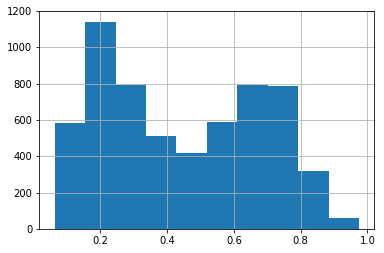

In [65]:
X[y=="1"]["../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv"].hist()

In [68]:
a = X[y=="1"][X["../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv"] >= 0.5]

C:\Users\keisu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [69]:
b = X[y=="1"][X["../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv"] < 0.5]

C:\Users\keisu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [71]:
a.describe()

,X2_1,X2_2,X3_6,X3_0,X3_3,X3_1,X3_2,X3_4,X3_5,X4_3,...,X15_std,X16_std,X17_std,X18_std,X19_std,X20_std,X21_std,X22_std,X23_std,../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv
count,2634.000000,2634.000000,2634.000000,2634.0,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,...,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000
mean,0.449506,0.550494,0.000380,0.0,0.206530,0.256644,0.534169,0.000380,0.001898,0.012908,...,0.143563,0.166809,0.171228,-0.178475,-0.136013,-0.116156,-0.151147,-0.136575,-0.126769,0.683583
std,0.497538,0.497538,0.019485,0.0,0.404892,0.436864,0.498926,0.019485,0.043536,0.112900,...,1.033802,1.077715,1.049114,0.327163,0.322190,0.817396,0.407172,0.586203,0.655485,0.098322
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.401021,-1.433280,-1.436212,-0.342107,-0.251371,-0.294674,-0.306768,-0.315561,-0.293231,0.500293
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.459923,-0.460135,-0.463478,-0.342107,-0.251371,-0.294674,-0.306768,-0.315561,-0.293231,0.607401
50%,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-0.224902,-0.199941,-0.186313,-0.239073,-0.185227,-0.221020,-0.243584,-0.241060,-0.237256,0.685237
75%,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.379004,0.371088,0.412476,-0.142101,-0.119073,-0.125614,-0.118637,-0.117595,-0.135620,0.758371
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.868680,8.364004,7.995053,7.841047,10.550345,28.345673,9.781134,18.688001,15.826545,0.974786


In [72]:
b.describe()

,X2_1,X2_2,X3_6,X3_0,X3_3,X3_1,X3_2,X3_4,X3_5,X4_3,...,X15_std,X16_std,X17_std,X18_std,X19_std,X20_std,X21_std,X22_std,X23_std,../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv
count,3360.000000,3360.000000,3360.000000,3360.0,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,...,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,0.418750,0.581250,0.001488,0.0,0.170536,0.344643,0.477976,0.001488,0.003869,0.012500,...,-0.150696,-0.157324,-0.155539,-0.111469,-0.086140,-0.091362,-0.076096,-0.085707,-0.081427,0.258931
std,0.493428,0.493428,0.038553,0.0,0.376159,0.475322,0.499589,0.038553,0.062090,0.111119,...,0.943035,0.927628,0.929790,0.594555,0.608768,0.714686,0.873492,0.850541,0.798310,0.108548
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.690033,-1.538421,-6.356305,-0.342107,-0.251371,-0.294674,-0.306768,-0.315561,-0.293231,0.062665
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.668093,-0.659675,-0.649352,-0.336561,-0.246298,-0.294674,-0.306768,-0.315561,-0.293231,0.173164
50%,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.517998,-0.512849,-0.521957,-0.245134,-0.187832,-0.229981,-0.243584,-0.249573,-0.237256,0.240343
75%,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-0.092680,-0.163913,-0.146114,-0.122570,-0.103115,-0.125614,-0.120232,-0.117595,-0.125306,0.336109
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.759544,7.057017,7.374685,13.944867,14.942278,17.709846,26.997126,21.592692,19.034525,0.499956


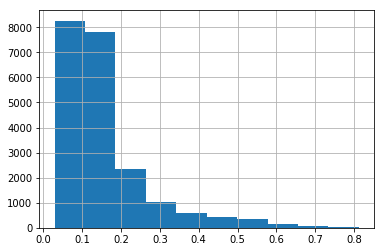

In [66]:
X[y=="0"]["../data/mid/rf_f847c3ee-5e15-11e9-af66-f06e0bb794dc.csv"].hist()